<a href="https://colab.research.google.com/github/PatchFramework/data-exploration-project/blob/main/data_exploration_anime_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration Project - Anime Recommendation
#### Team: PostgreSQL (Can Berkil, Canberk Alkan, Dominic Viola)
This Jupyter Notebook is designed to run on Google Colab, as it provides a standardized Linux environment and preinstalled applications. It contains the code that is used to download and analyse an Anime dataset. Afterwards the dataset is used to build a recommendation engine.



## Development Notes:

ToDo:

1. Headings and their content for: 
- Data selection (why did we choose this dataset? <- use information from Canberks PowerPoint) <- Canberk
- Data cleaning 
- Data transformation 
- Data exploration
- Model selection (papers to determine suitable algorithms)

## 1. Download the dataset
The dataset is from Kaggle you can find general information about it [here](https://www.kaggle.com/CooperUnion/anime-recommendations-database?select=rating.csv).

I downloaded the dataset to my private google drive and created a public link to ensure that the dataset is available. This is in compliance with the dataset's Creative Commons License.

In [ ]:
# Download the dataset from my google drive
!gdown --id 1XPYCQvsGq4cKp1liPmxPDd7QkU04Kj4X -O ./anime_dataset.zip
!ls

Downloading...
From: https://drive.google.com/uc?id=1XPYCQvsGq4cKp1liPmxPDd7QkU04Kj4X
To: /content/anime_dataset.zip
26.3MB [00:00, 71.8MB/s]
anime_dataset.zip  sample_data


In [ ]:
# create a directory for the data
!mkdir data

# after downloading the dataset as a zip unzip the dataset into the new folder
!unzip anime_dataset.zip -d ./data/

!ls data

Archive:  anime_dataset.zip
  inflating: ./data/anime.csv        
  inflating: ./data/rating.csv       
anime.csv  rating.csv


## 2. Data Selection

This section will shed a light on why we chose [this](https://www.kaggle.com/CooperUnion/anime-recommendations-database?select=rating.csv) dataset and what the characteristics of the dataset are.

## 3. Fundamental dataset exploration

Now we will explore the content and structure of this dataset.


Lets see how the csv files that we downloaded are structured.
Lets look at the first few lines of each file with the linux command "head".

We want to find information about:
- column names
- datatypes  
- the seperator (we need it for pandas later)
- how the CSV files are connected


In [ ]:
!head -5 data/anime.csv

anime_id,name,genre,type,episodes,rating,members
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572


In [ ]:
!head -5 data/rating.csv

user_id,anime_id,rating
1,20,-1
1,24,-1
1,79,-1
1,226,-1


What we can learn from this first peak into the dataset:
1. Columns in anime.csv
- "anime_id" is the identifier for each anime
- "name" contains the name as a string but without quotes
- "genre" contains all genres that the anime is part of, quotes are used, so that the comma seperated genres are not confused with csv fields
- "type" shows which medium type the anime is 
- "rating" seems to be a general rating from 1 to 10
- "members" ?

2. Columns in rating.csv
- "user" is the id of the user, that gave the rating
- "anime_id" is the identifier of the anime, this is the connecting field to anime.csv
- "rating" is the rating that the user gave the anime. There is -1 as an entry which can't be an actual rating, so -1 could mean, that the user didn't rate the anime

3. The seperator is a comma for both csv-files


## 4. Data Cleaning
We will drop unnecessary fields from the dataset, check the dataset for inconsistencies and redundancies. Also fields with incorrect datatypes will be fixed.

We will use the following libraries to process the data:
1. Pandas: To save the dataset to dataframes for easier handling and manipulation in python
2. Seaborn: Visualize some of the data to get an overview over the content

In [ ]:
# Install the library packages (might be already installed)
!pip3 install pandas seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
anime_df = pd.read_csv("data/anime.csv")
rating_df = pd.read_csv("data/rating.csv")

In [ ]:
# Total amount of Anime in this dataset
len(anime_df["anime_id"])

12294

In [ ]:
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
# Existing columns in anime_df and rating_df
anime_df.columns
rating_df.columns

"""
Keep in mind that both anime_df and rating_df do have the attribute "anime_id".
This will be important to merge both DataFrames.
"""

'\nKeep in mind that both anime_df and rating_df do have the attribute "anime_id".\nThis will be important to merge both DataFrames.\n'

In [ ]:
# Since members is not needed for the data analysis, it can be dropped
anime_df.drop(columns=["members"], inplace=True)

In [ ]:
# Total amount of Users who rated Anime
rating_df["user_id"].unique()

array([    1,     2,     3, ..., 73514, 73515, 73516])

In [ ]:
# Total amount of Anime Genre in this dataset
len(anime_df["genre"].unique())

3265

## 5. Data transformation

In this step we convert datafields to fine granular elements and combine dataframes, so that we can prepare the data for processing in our model.

In [ ]:
# Now we will merge the two DataFrames, so we only have to handle one 
anime_with_ratings = pd.merge(rating_df, anime_df, on="anime_id")

In [ ]:
anime_with_ratings

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81
...,...,...,...,...,...,...,...,...
7813722,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17
7813723,69497,33484,10,Shiroi Zou,"Action, Historical, Kids",Movie,1,4.71
7813724,70463,29481,-1,Kakinoki Mokkii,"Fantasy, Kids",Special,1,4.33
7813725,72404,34412,-1,Hashiri Hajimeta bakari no Kimi ni,Music,Music,1,6.76


## 6. Advanced Data Exploration 
We will now analyse the transformed data to see which similarities and patterns might occur. Also assumptions about the necessary model and the challenges that may arise while training it can be made. Furthermore, the advanced exploration of the data can be used to assess the performance of the model in later steps.

In [ ]:
#Count all Genres in our Data-Set
genre_count = anime_with_ratings["genre"].value_counts()
genre_count

Hentai                                       62435
Comedy, School, Slice of Life                61404
Comedy                                       54154
Comedy, Slice of Life                        52569
Action, Adventure, Fantasy, Game, Romance    50051
                                             ...  
Action, Game, Kids                               1
Kids, Mystery                                    1
Comedy, Parody, Police, Slice of Life            1
Comedy, Fantasy, Kids, Sci-Fi                    1
Adventure, Fantasy, Historical, Sci-Fi           1
Name: genre, Length: 3154, dtype: int64

In [ ]:
#Show Top 10 Genres in our Data-Set
from collections import Counter
top10_genres= genre_count[:10]
top10_genres
top10_genres_title= Counter(anime_with_ratings["genre"])
top10_genres_title= list(sorted(top10_genres_title, key=top10_genres_title.get, reverse=True)[:10])

<BarContainer object of 10 artists>

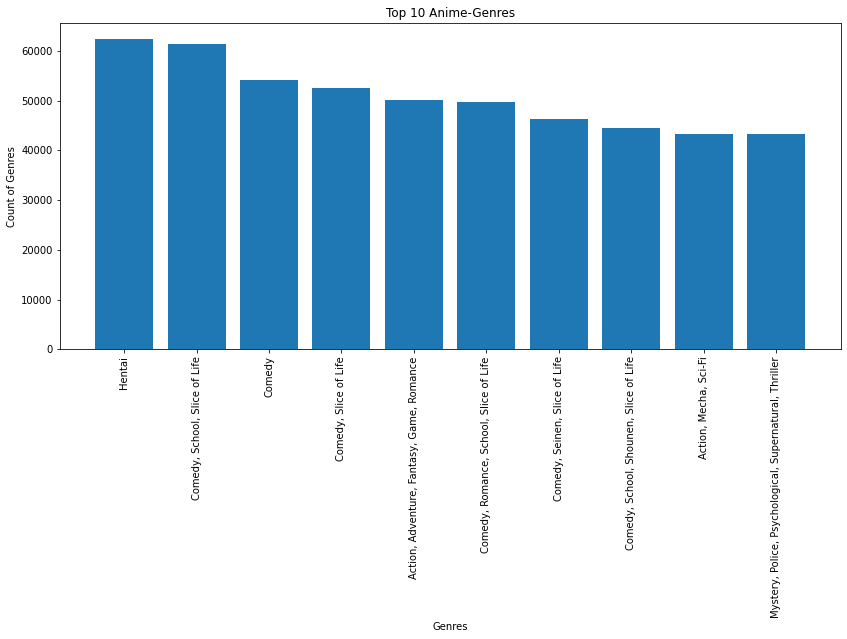

In [ ]:
#Plot results in a bar chart
fig = plt.figure(figsize = (14, 6))
plt.xlabel("Genres")
plt.ylabel("Count of Genres")
plt.title("Top 10 Anime-Genres")
plt.xticks(rotation=90)
plt.bar(height=top10_genres,x=top10_genres_title)

In [ ]:
#Count how often a specific type appears in our data set
type_count = anime_with_ratings["type"].dropna().value_counts()
type_count
type_name= Counter(anime_with_ratings["type"].dropna())
type_name= list(sorted(type_name, key=type_name.get, reverse=True))
type_name

['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music']

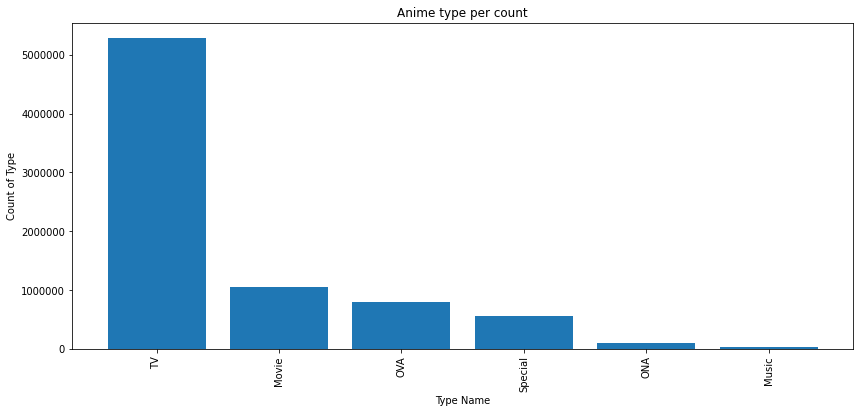

In [ ]:
fig = plt.figure(figsize = (14, 6))
plt.xlabel("Type Name")
plt.ylabel("Count of Type")
plt.title("Anime type per count")
plt.xticks(rotation=90)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.bar(height=type_count,x=type_name)
plt.show()

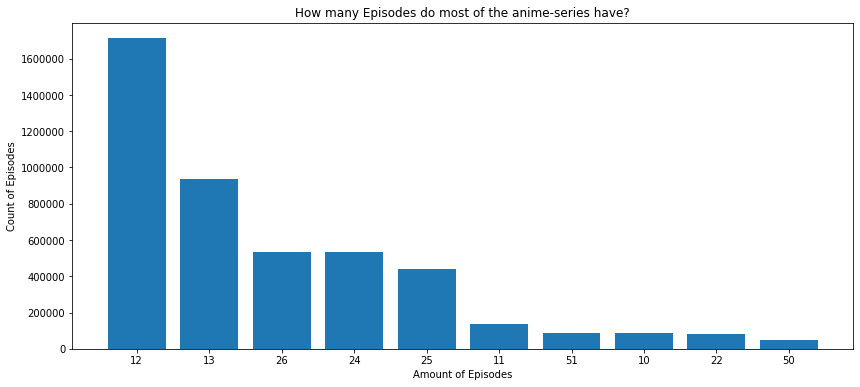

In [ ]:
#Count Episodes in Type TV / How many Series got a specific amount of episodes?
fig = plt.figure(figsize = (14, 6))
tv = anime_with_ratings[anime_with_ratings.type == "TV"]
episodes_count = tv["episodes"].value_counts()
e_t10 = episodes_count[:10]
plt.xlabel("Amount of Episodes")
plt.ylabel("Count of Episodes")
plt.title("How many Episodes do most of the anime-series have?")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.bar(height=e_t10, x=list(e_t10.index))
plt.show()

## 6. Model selection
We will discuss which considerations were made to select a fitting model for this dataset and context. We will also provide the scientific foundation for the selected model and any further considerations that went into the model selection and appropriate metrics that are derived from the model or fed into the model. 

## 7. Model training 
The dataset will be split into train and test samples and the model will be trained to give anime recommendations based on any users data.